# Lecture 8 -- Analysis and Visualization

## Outline

* We have learned how many different tools work, how to apply them, and how to train and build some of our own models.

* however, we have not yet taken the step of applying these tools together in a meaningful way.

* in this chapter we are going to do just that

* we will use the tools we have learned to answer a question by analyzing a dataset and visualizing and reporting our results

## Coming Up With Questions

* there are a lot of questions we can ask about this data. but generally a good place to start is by asking something simple that may reveal a larger pattern for further investigation

* for example, lets try to answer the question "how are public comment's typically structured in city council meetings?"

## Planning

* our first step in this process is to break down how we can answer our question

* within each meeting, we will want to identify the sentences / portions which are public comments -- when you are working on identification problems, **classification** is always a good place to start

* we will also want to look into the structure. a few examples of public comments might be (note, the names and organizations are made up, but the sentence structure comes directly from meetings of the Seattle City Council):

  * Good afternoon, Councilmembers. My name is Lisa and I'm speaking for Parents for Police today. And we, I'd like to support, here to support the appointment of Bill as Executive Director of the CPC. ...
  * Hello, I'm Bryce Chin, Chair of Justice Washington and a District 7 constituent. I am speaking in opposition to the SPOG MOU. ...
  * Hi, council members. My name is Tim Brown and I live on Capitol Hill and run a small business in Soto. I'm calling today to urge you to vote no on the SPOG memo of understanding. ...

* we can see that there are a few different structures here. some people introduce themselves, some people introduce their organization, some people introduce their district, they usually say what they are speaking about, and then they say what they want the council to do

* To start, lets try to breakdown comments by:
  * "self-introduction" - the speaker introduces themselves
  * "org-introduction" - the speaker can optionally introduce themselves but additionally introduces an organization
  * "other" - the speaker does not introduce themselves or an organization

* this is a complex task, and one we can likely train yet another classification model for but we might want to use something to help us annotate data

* before we do any of this, we will probably want to work with a small dataset before scaling up to the entire corpus

* lets start by trying to identify the start and end of the public comment / public hearing sections of the meeting

In [1]:
from cdp_data import CDPInstances, datasets

sessions = datasets.get_session_dataset(
    CDPInstances.Seattle,
    start_datetime="2021-01-01",
    end_datetime="2022-01-01",
    store_transcript=True,
    raise_on_error=False,
)
sessions

Fetching each model attached to event_ref:   0%|          | 0/226 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/226 [00:00<?, ?it/s]

,session_datetime,session_index,session_content_hash,video_uri,video_start_time,video_end_time,caption_uri,external_source_id,id,key,event,transcript,transcript_path
0,2021-01-04 17:30:00+00:00,0,afb06065232167ccc35ad4cc7bb24c46a67357846c6acd...,https://video.seattle.gov/media/council/brief_...,None,None,https://www.seattlechannel.org/documents/seatt...,None,de9d821a3aba,session/de9d821a3aba,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
1,2021-01-04 22:00:00+00:00,0,81a736cb5605f776712765dd770df7a28f554987c893ea...,https://video.seattle.gov/media/council/counci...,None,None,https://www.seattlechannel.org/documents/seatt...,None,f1434b7a9fa2,session/f1434b7a9fa2,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
2,2021-01-11 17:30:00+00:00,0,8265168b36b383e19509244766c0d4e789230ee839371b...,https://video.seattle.gov/media/council/brief_...,None,None,https://www.seattlechannel.org/documents/seatt...,None,fe7c8aa0dd58,session/fe7c8aa0dd58,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
3,2021-01-11 22:00:00+00:00,0,386d37689ea482446c8837f1a950c66af9d0bbf7f04ba0...,https://video.seattle.gov/media/council/counci...,None,None,https://www.seattlechannel.org/documents/seatt...,None,2b30cc0f5847,session/2b30cc0f5847,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
4,2021-01-12 17:30:00+00:00,0,91118e8a210e92600a869df3e4e4b7c27b2785d025c2f0...,https://video.seattle.gov/media/council/safe_0...,None,None,https://www.seattlechannel.org/documents/seatt...,None,eff5db85156a,session/eff5db85156a,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2021-12-10 17:30:00+00:00,0,30fa17ba9b2eab53bf435b47a16dc97f6130dc1ac31dca...,https://video.seattle.gov/media/council/econ_1...,None,None,https://www.seattlechannel.org/documents/seatt...,None,5930000b2d24,session/5930000b2d24,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
222,2021-12-13 17:30:00+00:00,0,0c190b87881c4d1c598ec67eb267129170ee2e773550df...,https://video.seattle.gov/media/council/brief_...,None,None,https://www.seattlechannel.org/documents/seatt...,None,62504aeb2c9e,session/62504aeb2c9e,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
223,2021-12-13 22:00:00+00:00,0,ce27b141953c0e4e281ff6d99bb98fae719b0447a8690a...,https://video.seattle.gov/media/council/counci...,None,None,https://www.seattlechannel.org/documents/seatt...,None,726ec414e79f,session/726ec414e79f,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...
224,2021-12-14 17:30:00+00:00,0,1d5d9034b132cdc8702ce7399729a9a01526639cc8e4fb...,https://video.seattle.gov/media/council/safe_1...,None,None,https://www.seattlechannel.org/documents/seatt...,None,42c7d47dd1b9,session/42c7d47dd1b9,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/home/eva/active/research/ml-for-pit/content/0...


## Constructing a Dataset for Training a Public Comment Period Start and End Classifier

* the first thing we will want to do is to identify the start and end of the public comment sections

* to do so, lets construct a dataset for annotation

* we are going to try and help ourselves as much as possible with the annotation by using a few tools

* first, we will iterate over a sample of the meetings and read the transcript

* we will then embed each of the sentences within each transcript and calculate the cosine similarity between the current sentence and "ideal" sentences for the start and end of a public comment section.

* these usually look like "the public comment period is now open" and "the public comment period is now closed"

* for each meeting, we we will then take the top three most similar sentences for of the "ideal" sentences and build a dataset for annotation

* further, we will use something call "negative sampling" to help gather up examples that are by estimate, not likely to be related to the start or end of a public comment section
    * more reading on "negative sampling" can be found here: http://deepdive.stanford.edu/generating_negative_examples

In [2]:
from cdp_backend.pipeline.transcript_model import Transcript
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
from tqdm import tqdm
import pandas as pd
import numpy as np

# Set seed
np.random.seed(42)

# Init the model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Embed the "ideal" open and close statements
pc_open = "The public comment period is now open"
pc_closed = "The public comment period is now closed"
pc_open_embed = model.encode(pc_open)
pc_closed_embed = model.encode(pc_closed)

# Sampled sessions
samples_sessions = sessions.sample(100)

# For each session, open the transcript,
# get the top three most similar sentences to the open and close statements
n_random_sentences = 10
statements_for_annotation = []
for _, session in tqdm(
    samples_sessions.iterrows(),
    total=len(samples_sessions),
    desc="Sessions",
):
    # Read transcript
    with open(session.transcript_path) as open_f:
        transcript = Transcript.from_json(open_f.read())

    # Get the top three most similar sentences to the open statement
    open_similarities = cos_sim(
        pc_open_embed,
        model.encode([s.text for s in transcript.sentences]),
    ).squeeze()
    open_similarities = pd.Series(open_similarities)
    open_similarities = open_similarities.sort_values(ascending=False)
    open_similarities = open_similarities[:3]

    # Get sentences associated with top three
    open_sentences = [
        transcript.sentences[i] for i in open_similarities.index
    ]
    # Add these to the dataframe
    open_sentences_df = pd.DataFrame(
        {
            "infra": [CDPInstances.Seattle] * len(open_sentences),
            "session_id": [session["id"]] * len(open_sentences),
            "sentence": [s.text for s in open_sentences],
            "label": [""] * len(open_sentences),
        }
    )

    # Get the top three most similar sentences to the close statement
    close_similarities = cos_sim(
        pc_closed_embed,
        model.encode([s.text for s in transcript.sentences]),
    ).squeeze()
    close_similarities = pd.Series(close_similarities)
    close_similarities = close_similarities.sort_values(ascending=False)
    close_similarities = close_similarities[:3]
    
    # Get sentences associated with top three
    close_sentences = [
        transcript.sentences[i] for i in close_similarities.index
    ]
    # Add these to the dataframe
    close_sentences_df = pd.DataFrame(
        {
            "infra": [CDPInstances.Seattle] * len(close_sentences),
            "session_id": [session["id"]] * len(close_sentences),
            "sentence": [s.text for s in close_sentences],
            "label": [""] * len(close_sentences),
        }
    )

    # Also add n_random_sentences random sentences from the transcript pre-labeled as False
    # This is called negative sampling
    # The main idea is that because the transcripts have so much more data than just the open and close statements
    # we can randomly select some sentences and assume they are not open or close statements
    # This is a good way to get a lot of negative examples
    random_negative_samples = np.random.choice(
        transcript.sentences, size=n_random_sentences, replace=False
    )
    random_negative_samples_df = pd.DataFrame(
        {
            "infra": [CDPInstances.Seattle] * len(random_negative_samples),
            "session_id": [session["id"]] * len(random_negative_samples),
            "sentence": [s.text for s in random_negative_samples],
            "label": ["other"] * len(random_negative_samples),
        }
    )

    # Concatenate the open and close dataframes
    statements_for_annotation.append(
        pd.concat([open_sentences_df, close_sentences_df, random_negative_samples_df])
    )

# Concatenate all the dataframes in the statements_for_annotation list
statements_for_annotation = pd.concat(statements_for_annotation)

# It's likely that some of the sentences are duplicates
# We can remove these by dropping duplicates
statements_for_annotation = statements_for_annotation.drop_duplicates(
    subset=["session_id", "sentence"],
)

statements_for_annotation

Sessions: 100%|██████████| 100/100 [03:27<00:00,  2.07s/it]


,infra,session_id,sentence,label
0,cdp-seattle-21723dcf,79e99b4d52d7,There are no public commenters.,
1,cdp-seattle-21723dcf,79e99b4d52d7,I don't believe we have anyone signed up for p...,
2,cdp-seattle-21723dcf,79e99b4d52d7,We are adjourned.,
0,cdp-seattle-21723dcf,79e99b4d52d7,"And unfortunately, the pandemic has changed th...",other
1,cdp-seattle-21723dcf,79e99b4d52d7,Chair Morales?,other
...,...,...,...,...
5,cdp-seattle-21723dcf,e3db90d050a9,I'm not seeing any additional questions.,other
6,cdp-seattle-21723dcf,e3db90d050a9,The legislation already gives the OLS director...,other
7,cdp-seattle-21723dcf,e3db90d050a9,Yes.,other
8,cdp-seattle-21723dcf,e3db90d050a9,Is there a deadline that we're hoping to have ...,other


* We now have a nice dataframe ready for export and annotation
* For each sentence, we can label it as either:
    * "start" - the start of a public comment section
    * "end" - the end of a public comment section
    * "other" - neither the start nor the end of a public comment section

* we can then export this dataframe to a csv file for annotation

In [3]:
# Save the dataframe to a CSV
statements_for_annotation.to_csv(
    "public_comment_start_end_other_statements_for_annotation.csv", index=False
)

* once the data has been annotated, we can then load it back into python and train a classifier

* for a quick overview of the dataset, we can print the value counts of the labels

In [4]:
annotated_statements = pd.read_csv(
    "annotated_public_comment_start_end_other_statements.csv"
)
annotated_statements.label.value_counts()

other    1181
start      93
end        50
Name: label, dtype: int64

* lots and lots of examples of other
* almost double the examples of start vs end
* this is somewhat expected as there is a lot of administrative cruft that occurs before the start of a public comment section
* and during annotation, we annotated any statement that seemed to be a part of that cruft as "start"

## Training a Public Comment Period Start and End Classifier

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Precision: 0.993, Recall: 0.992, F1: 0.992
Precision: 0.993, Recall: 0.992, F1: 0.992


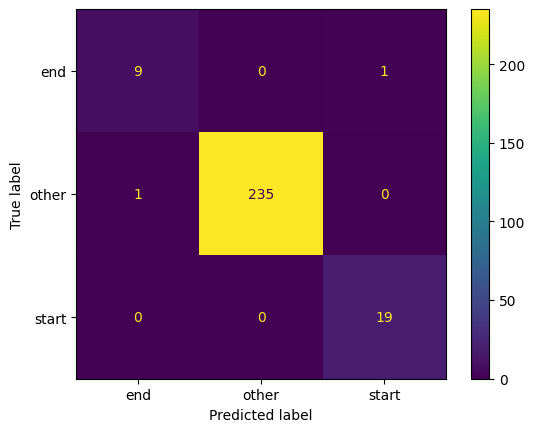

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support, ConfusionMatrixDisplay

# Function for quickly training model and evaluating on test set
def train_and_eval_model(
    data: pd.DataFrame,
) -> tuple[LogisticRegressionCV, float, float, float, ConfusionMatrixDisplay]:
    # Create train and test splits
    x_train, x_test, y_train, y_test = train_test_split(
        data["sentence"],
        data["label"],
        test_size=0.2,
        random_state=42,
        stratify=data["label"],
    )

    # Create embedded text values
    embedded_x_train = model.encode(x_train.values, show_progress_bar=True)
    embedded_x_test = model.encode(x_test.values, show_progress_bar=True)

    # Train model
    trsfmr_clf = LogisticRegressionCV(random_state=42, max_iter=500)
    trsfmr_clf.fit(embedded_x_train, y_train)

    # Eval
    y_pred = trsfmr_clf.predict(embedded_x_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

    # Confusion per label
    matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=trsfmr_clf.classes_)

    return trsfmr_clf, precision, recall, f1, matrix

# Train and eval model
clf, precision, recall, f1, matrix = train_and_eval_model(
    annotated_statements
)

# Print stats
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
matrix

In [6]:
# Find the misclassified statements
x_test = annotated_statements["sentence"]
y_test = annotated_statements["label"]
embedded_x_test = model.encode(x_test.values, show_progress_bar=True)
y_pred = clf.predict(embedded_x_test)
misclassified = annotated_statements[y_test != y_pred].copy()
misclassified["pred"] = y_pred[y_test != y_pred]
for _, row in misclassified.iterrows():
    print(f"True: {row['label']}, Pred: {row['pred']}, Sentence: {row['sentence']}")

Batches:   0%|          | 0/42 [00:00<?, ?it/s]

True: end, Pred: start, Sentence: Seeing as we have no additional speakers present the public comment period is now open and we will move on to the next agenda item.
True: other, Pred: end, Sentence: Public comment period is open and closed.


* These seem okay! Only two sentences are misclassified! And in both cases they seem odd.
    * in one it seems like there may have been a typo or the speaker misspoke because they say "public comment period is now open" even though there are no speakers.
    * in the other, the speaker says "Public comment period is open and closed" which happens sometimes when no one signs up to speak.

* Granted, we didn't use too much data and we have yet to test it on meetings outside of Seattle but this is a good start for us to use further

## Using our model to extract public comment periods from meetings

* Now lets try and build a function to use this model to find public comment periods within a meeting

* We will first classify each sentence in meeting using the classifer

* Once we have found a sentence that is classified as a public comment period "start", we will both, continue to look for further "start" sentences (as there may be later administrative cruft), additionally we will then look for the next sentence that is classified as a the "end" of a public comment period

* we will then return the sentences between the last start and the first end

In [7]:
def get_public_comment_periods(
    transcript_path: str,
) -> list[str]:
    # Read in the transcript
    with open(transcript_path) as open_f:
        transcript = Transcript.from_json(open_f.read())
    
    # Init the list of public comment periods
    pc_periods = []
    last_open_index = -1

    # Iter over sentences and classify each one with the open classifier
    # Once we have found a sentence that is classified as a public comment open
    # we will both, continue to look for future classifications of public comment open
    # (as there may be administrative cruft and we want the _last_ public comment open)
    # and we will start looking for the close statement
    # additionally, we will look for the close statement
    # once we find one, we will extract all of the sentences between the last open and the first close
    # as a single public comment period

    # note, there may be multiple public comment periods in a single meeting
    # so we will return a list of public comment periods
    for i, sentence in enumerate(transcript.sentences):
        # Embed the sentence
        embedded_sentence = model.encode(sentence.text)

        # Shape the embedded sentence for sklearn
        embedded_sentence = embedded_sentence[np.newaxis,:]

        # Predict if the sentence is a public comment open
        pred = clf.predict(embedded_sentence)[0]

        # If it is a public comment open
        if pred == "start":
            # Update the last open index
            last_open_index = i
        
        # If we have seen a public comment open
        elif last_open_index > -1:
            # If it is a public comment close
            if pred == "end":
                # Get all the sentences between the last open and the close
                pc_period = transcript.sentences[last_open_index:i+1]
                # Add the pc period to the list
                pc_periods.append([s.text for s in pc_period])
                # Reset the last open index
                last_open_index = -1

    return pc_periods

# Try our function on a single random transcript
np.random.seed(8)
example_session = sessions.sample(1).iloc[0]
get_public_comment_periods(example_session.transcript_path)[0]

['Okay, so we will go ahead and open the public comment period for now.',
 'We will begin with Austin Miller.',
 'Austin, please press Star six and go ahead.',
 "Hello, Councilmembers, my name is Austin Miller, and I'm Speking today on behalf of the Seattle restaurant alliance to share our support for CB 120092.",
 'Without this, many platforms list restaurants without their knowledge.',
 'Customers assume the restaurants have agreed to be listed of an delivery platform and will place blame on a restaurant for issues that arise with their order.',
 'This can cause damage to their reputation and success.',
 'By requiring that food delivery platforms operating in Seattle first obtain a written agreement with any restaurant prior to offering Take-Out or delivery services, this legislation will ensure the best customer experience with accurate pricing, menu options and the best quality food.',
 'The Seattle restaurant alliance would like to thank Council President Gonzalez for her leadersh

* This is great! It seems like we have a function which can extract public comment periods from meetings

* Normally you would want to evaluate this function / method as well by annotating meetings but for now we will use it as is

* Let's extract the public comment periods from each meeting and save them to a new dataframe

In [8]:
# Get all the public comment periods for all the transcripts
all_pc_periods = []
for _, session in tqdm(
    sessions.iterrows(),
    total=len(sessions),
    desc="Sessions",
):
    this_session_pc_periods = get_public_comment_periods(session.transcript_path)
    
    # Add a row to the dataframe for each public comment period
    for pc_period in this_session_pc_periods:
        all_pc_periods.append(
            {
                "infra": CDPInstances.Seattle,
                "session_id": session["id"],
                "pc_period": pc_period,
            }
        )

# Convert to dataframe
all_pc_periods = pd.DataFrame(all_pc_periods)
all_pc_periods

Sessions:   0%|          | 1/226 [00:02<08:38,  2.30s/it]

* It seems like out of the original 226 sessions we gathered, we have 135 sessions with public comment periods

* lets also calculate the mean number of public comment periods per meeting and find any meetings with multiple

In [ ]:
# Calculate mean number of public comment periods per session
all_pc_periods.groupby("session_id").pc_period.count().mean()

In [ ]:
# Get dataframe of pc_periods for sessions that have multiple pc_periods
sessions_with_multiple_pc_periods = all_pc_periods.groupby("session_id").pc_period.count()
sessions_with_multiple_pc_periods = sessions_with_multiple_pc_periods[sessions_with_multiple_pc_periods > 1]
len(sessions_with_multiple_pc_periods)

* so it seems like there are only 10 sessions in our dataset with multiple public comment periods
* this can happen but in Seattle is somewhat rare so this somewhat makes sense but again, we would want to evaluate this function further
* the last thing we will do is to save the dataframe to a csv file for further analysis

In [ ]:
# save dataframe for next analysis
all_pc_periods.to_csv("all_pc_periods.csv", index=False)